In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl

import math
import numpy as np
import pandas as pd
import tensorflow as tf
import socket
import importlib
import os
import sys
#BASE_DIR = os.path.dirname(os.path.abspath(__file__))
#sys.path.append(BASE_DIR)
from pointnetvlad_cls import *
from loading_pointclouds_4096 import *
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KDTree
#from evaluation_cls import *

/home/jaybie/.conda/envs/mr-environment/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/srv/jaybie/archive/spatial-privacy-master/pointnetvlad_submaps/


In [2]:
BATCH_NUM_QUERIES = 3#FLAGS.batch_num_queries
EVAL_BATCH_SIZE = 1
NUM_POINTS = 4096
POSITIVES_PER_QUERY= 4#FLAGS.positives_per_query
NEGATIVES_PER_QUERY= 12#FLAGS.negatives_per_query
GPU_INDEX = 0#FLAGS.gpu
DECAY_STEP = 200000#FLAGS.decay_step
DECAY_RATE = 0.7#FLAGS.decay_rate

global DATABASE_VECTORS
DATABASE_VECTORS = []

global QUERY_VECTORS
QUERY_VECTORS = []

global QUERY_DATABASE_NUMPY
QUERY_DATABASE_NUMPY = []

BN_INIT_DECAY = 0.5
BN_DECAY_DECAY_RATE = 0.5
BN_DECAY_DECAY_STEP = float(DECAY_STEP)
BN_DECAY_CLIP = 0.99

In [3]:
QUERY_PATH = 'pointnetvlad_submaps/'

DATABASE_FILE= 'pointnetvlad_submaps/3d_evaluation_database.pickle' #3d_spaces_evaluation_database
#QUERY_FILE= 'generating_queries/spatial_privacy_evaluation_query.pickle'
        
LOG_DIR = 'model/'
#MODEL_DIR = 'baseline/'
model_file= "model_3d_4m_jittered_4096.ckpt" #"model_baseline.ckpt"#

DATABASE_SETS= get_sets_dict(DATABASE_FILE)
#QUERY_SETS= get_sets_dict(QUERY_FILE)

RESULTS_FOLDER="testing_results/pointnetvlad/"
if not os.path.exists(RESULTS_FOLDER): os.mkdir(RESULTS_FOLDER)   

Trajectories Loaded.


In [4]:
BASE_PATH = 'pointnetvlad_submaps'
all_folders= ['raw_dataset']

print(all_folders)

DATABASE_DFS = []

for folder in all_folders:
    
    print("Training df for:",folder)
    df_database= pd.DataFrame(columns=['file','northing','easting','alting'])

    df_locations= pd.read_csv(os.path.join(BASE_PATH,folder,"pointcloud_centroids_4m_0.25.csv"),sep=',')

    DATABASE_DFS.append(df_locations)

['raw_dataset']
Training df for: raw_dataset


In [ ]:
pickle_file = 'partial_results_2.pickle'

try:
    with open(RESULTS_FOLDER + pickle_file,'rb') as pickle_output:
        results_pickle = pickle.load(pickle_output)
except:
    print("No pickle file yet:",pickle_file)
    results_pickle = []
    
for radius in np.arange(0.25,3.1,0.25):
    
    query_fol = 'ransac_partial_radius_'+str(radius)+"_4096_unassisted"#
    
    QUERY_FILE = 'pointnetvlad_submaps/3d_{}_evaluation_query.pickle'.format(query_fol)
    
    output_file = RESULTS_FOLDER +pickle_file+query_fol+'.txt'
    
    QUERY_SETS= get_sets_dict(QUERY_FILE)

    query_partial_path = os.path.join(QUERY_PATH,query_fol)

    df_test= pd.read_csv(os.path.join(query_partial_path,"pointcloud_centroids_4m.csv"),sep=',')
    
    QUERY_DATABASE_NUMPY = np.asarray(df_test)
    
    print("Doing",QUERY_FILE,query_partial_path)
    
    ave_recall, ave_intra_dist = evaluate(QUERY_SETS, output_file)
    
    results_pickle.append([
            radius,
            ave_recall,
            ave_intra_dist
        ])

    with open(RESULTS_FOLDER + pickle_file,'wb') as pickle_output:
        pickle.dump(results_pickle,pickle_output)

    

No pickle file yet: partial_results_2.pickle
Trajectories Loaded.
Doing pointnetvlad_submaps/3d_ransac_partial_radius_0.25_4096_unassisted_evaluation_query.pickle pointnetvlad_submaps/ransac_partial_radius_0.25_4096_unassisted
In Graph
Tensor("Placeholder_4:0", shape=(), dtype=bool, device=/device:GPU:0)
Tensor("query_triplets/concat:0", shape=(3, 17, 4096, 3), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(990, 256)
0 0 Database output: (27912, 256) Queries ou

In [12]:
pickle_file = 'raw_partial_results.pickle'

try:
    with open(RESULTS_FOLDER + pickle_file,'rb') as pickle_output:
        results_pickle = pickle.load(pickle_output)
except:
    print("No pickle file yet:",pickle_file)
    results_pickle = []
    
for radius in np.arange(0.25,3.1,0.25):
    
    query_fol = 'raw_partial_radius_'+str(radius)+"_4096_unassisted"#
    
    QUERY_FILE = 'pointnetvlad_submaps/3d_{}_evaluation_query.pickle'.format(query_fol)
    
    output_file = RESULTS_FOLDER +pickle_file+query_fol+'.txt'
    
    QUERY_SETS= get_sets_dict(QUERY_FILE)

    query_partial_path = os.path.join(QUERY_PATH,query_fol)

    df_test= pd.read_csv(os.path.join(query_partial_path,"pointcloud_centroids_4m.csv"),sep=',')
    
    QUERY_DATABASE_NUMPY = np.asarray(df_test)
    
    print("Doing",QUERY_FILE,query_partial_path)
    
    ave_recall, ave_intra_dist = evaluate(QUERY_SETS, output_file)
    
    results_pickle.append([
            radius,
            ave_recall,
            ave_intra_dist
        ])

    with open(RESULTS_FOLDER + pickle_file,'wb') as pickle_output:
        pickle.dump(results_pickle,pickle_output)

    

No pickle file yet: raw_partial_results.pickle
Trajectories Loaded.
Doing pointnetvlad_submaps/3d_raw_partial_radius_0.25_4096_unassisted_evaluation_query.pickle pointnetvlad_submaps/raw_partial_radius_0.25_4096_unassisted
In Graph
Tensor("Placeholder_4:0", shape=(), dtype=bool, device=/device:GPU:0)
Tensor("query_triplets/concat:0", shape=(3, 17, 4096, 3), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(1000, 256)
0 0 Database output: (27912, 256) Queries outpu

Doing pointnetvlad_submaps/3d_raw_partial_radius_1.5_4096_unassisted_evaluation_query.pickle pointnetvlad_submaps/raw_partial_radius_1.5_4096_unassisted
In Graph
Tensor("Placeholder_4:0", shape=(), dtype=bool, device=/device:GPU:0)
Tensor("query_triplets/concat:0", shape=(3, 17, 4096, 3), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(1000, 256)
0 0 Database output: (27912, 256) Queries output: (1000, 256)

Recall: [32.1 37.9 42.1 43.8 45.8 47.1 47.9 49.3 50.1 

Model restored.
(1000, 256)
0 0 Database output: (27912, 256) Queries output: (1000, 256)

Recall: [93.6 94.9 95.6 96.  96.2 96.2 96.4 96.4 96.8 96.8 97.  97.3 97.3 97.5
 97.5 97.5 97.6 97.8 97.8 97.8 97.8 97.8 97.8 97.8 97.8] 1
Ave recall: [93.6 94.9 95.6 96.  96.2 96.2 96.4 96.4 96.8 96.8 97.  97.3 97.3 97.5
 97.5 97.5 97.6 97.8 97.8 97.8 97.8 97.8 97.8 97.8 97.8]
Average Inter-space Error: [0.064 0.051 0.044 0.04  0.038 0.038 0.036 0.036 0.032 0.032 0.03  0.027
 0.027 0.025 0.025 0.025 0.024 0.022 0.022 0.022 0.022 0.022 0.022 0.022
 0.022]
Ave Intra-space Distance Error: [4.60321254 0.07184944 0.05059384 0.02238351 0.01305268 0.
 0.01344106 0.         0.02090663 0.         0.00915422 0.02167956
 0.         0.00912981 0.         0.         0.00539819 0.01212609
 0.         0.         0.         0.         0.         0.
 0.        ]
Average similarity: 0.97905034
Average 1\%-recall: 97.8
Trajectories Loaded.
Doing pointnetvlad_submaps/3d_raw_partial_radius_2.75_4096_unassisted_evalua

In [13]:
pickle_file = 'partial_results_2.pickle'

try:
    with open(RESULTS_FOLDER + pickle_file,'rb') as pickle_output:
        results_pickle = pickle.load(pickle_output)
except:
    print("No results.")
    
pointnetvlad = []

for radius, recall, intra_dist in results_pickle:
    pointnetvlad.append([
        radius,
        recall[0],
        intra_dist[0]
    ])
    
pointnetvlad = np.asarray(pointnetvlad)

pickle_file = 'raw_partial_results.pickle'

try:
    with open(RESULTS_FOLDER + pickle_file,'rb') as pickle_output:
        results_pickle = pickle.load(pickle_output)
except:
    print("No results.")
    
pointnetvlad_raw = []

for radius, recall, intra_dist in results_pickle:
    pointnetvlad_raw.append([
        radius,
        recall[0],
        intra_dist[0]
    ])
    
pointnetvlad_raw = np.asarray(pointnetvlad_raw)

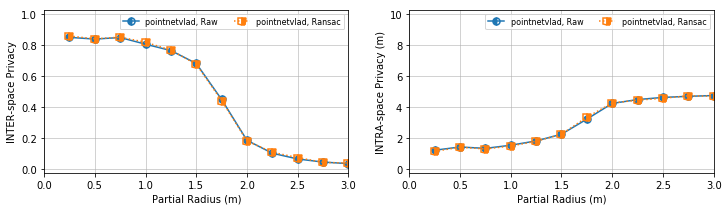

In [16]:
fig=plt.figure(figsize=(12, 3))

ax1 = fig.add_subplot(121) 

ax1.grid(alpha = 0.7)
ax1.set_ylim(-0.025,1.025)
ax1.set_xlim(0,3.0)
ax1.set_ylabel("INTER-space Privacy")
ax1.set_xlabel("Partial Radius (m)")

markersize = 7
linewidth = 1.5
#plt.minorticks_on()


ax1.plot(
    pointnetvlad_raw[:,0],
    pointnetvlad_raw[:,1],
    "-o",
    linewidth = linewidth,fillstyle = 'left',
    mew = linewidth,markersize = markersize,
    label = "pointnetvlad, Raw"
)

ax1.plot(
    pointnetvlad[:,0],
    pointnetvlad[:,1],
    ":s",
    linewidth = linewidth,fillstyle = 'right',
    mew = linewidth,markersize = markersize,
    label = "pointnetvlad, Ransac"
)

ax1.legend(loc = "upper right", ncol = 2, fontsize = 8);

ax2 = fig.add_subplot(122) 

ax2.grid(alpha = 0.7)
ax2.set_ylim(-0.25,10.25)
ax2.set_xlim(0,3)

ax2.set_ylabel("INTRA-space Privacy (m)")
ax2.set_xlabel("Partial Radius (m)")
#ax2.set_yticklabels(fontsize = 16)
#ax2.set_xticklabels(fontsize = 16)

#plt.minorticks_on()

ax2.plot(
    pointnetvlad_raw[:,0],
    pointnetvlad_raw[:,2],
    "-o",
    linewidth = linewidth,fillstyle = 'left',
    mew = linewidth,markersize = markersize,
    label = "pointnetvlad, Raw"
)
ax2.plot(
    pointnetvlad[:,0],
    pointnetvlad[:,2],
    ":s",
    linewidth = linewidth,fillstyle = 'right',
    mew = linewidth,markersize = markersize,
    label = "pointnetvlad, Ransac"
)

ax2.legend(loc = "upper right", ncol = 2, fontsize = 8);

#plt.savefig('arcore_results/partials-radius-pointnetvlad-jittered.png', format='png', dpi=300,bbox_inches = 'tight')

In [46]:
for radius in np.arange(0.5,2.1,0.5):
    
    pickle_file = 'successive_results_'+str(radius)+'.pickle'

    try:
        with open(RESULTS_FOLDER + pickle_file,'rb') as pickle_output:
            results_pickle = pickle.load(pickle_output)
    except:
        print("No "+pickle_file+" file yet.")
        results_pickle = []

    successive_path = 'successive_radius_'+str(radius)
    
    for release in np.arange(1,100,5):

        query_fol = 'release_'+str(release)

        QUERY_FILE = 'pointnetvlad_submaps/successive_queries/3d_jittered_{}_evaluation_query.pickle'.format(successive_path+"_"+query_fol)

        output_file = RESULTS_FOLDER +pickle_file+query_fol+'.txt'

        QUERY_SETS= get_sets_dict(QUERY_FILE)

        query_partial_path = os.path.join(QUERY_PATH,successive_path,query_fol)

        df_test= pd.read_csv(os.path.join(query_partial_path,"pointcloud_centroids_4m.csv"),sep=',')

        QUERY_DATABASE_NUMPY = np.asarray(df_test)

        print("Doing",QUERY_FILE,query_partial_path)

        ave_recall, ave_intra_dist = evaluate(QUERY_SETS, output_file)

        results_pickle.append([
                release,
                ave_recall,
                ave_intra_dist
            ])

        with open(RESULTS_FOLDER + pickle_file,'wb') as pickle_output:
            pickle.dump(results_pickle,pickle_output)
    


No successive_results_0.5.pickle file yet.
Trajectories Loaded.
Doing pointnetvlad_submaps/successive_queries/3d_jittered_successive_radius_0.5_release_1_evaluation_query.pickle pointnetvlad_submaps/successive_radius_0.5/release_1
In Graph
Tensor("Placeholder_4:0", shape=(), dtype=bool, device=/device:GPU:0)
Tensor("query_triplets/concat:0", shape=(3, 17, 4096, 3), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(226, 256)
0 0 Database output: (27912, 256) Querie

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(150, 256)
0 0 Database output: (27912, 256) Queries output: (150, 256)

Recall: [42.66666667 45.33333333 47.33333333 48.66666667 52.         52.66666667
 53.33333333 54.         54.         54.         54.66666667 55.33333333
 55.33333333 57.33333333 58.         58.66666667 58.66666667 59.33333333
 59.33333333 59.33333333 60.         60.         60.         60.
 61.33333333] 1
Ave recall: [42.66666667 45.33333333 47.33333333 48.66666667 52.         52

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(151, 256)
0 0 Database output: (27912, 256) Queries output: (151, 256)

Recall: [60.26490066 62.91390728 65.56291391 67.54966887 68.21192053 68.21192053
 70.1986755  70.86092715 71.52317881 72.18543046 72.84768212 72.84768212
 72.84768212 72.84768212 72.84768212 73.50993377 74.83443709 75.49668874
 75.49668874 75.49668874 76.1589404  76.1589404  76.1589404  76.1589404
 76.1589404 ] 1
Ave recall: [60.26490066 62.91390728 65.56291391 67.54966887 68.2119

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(154, 256)
0 0 Database output: (27912, 256) Queries output: (154, 256)

Recall: [70.12987013 75.97402597 79.22077922 79.87012987 81.16883117 81.16883117
 81.16883117 83.11688312 83.11688312 83.76623377 83.76623377 83.76623377
 84.41558442 85.06493506 85.71428571 86.36363636 86.36363636 86.36363636
 87.01298701 87.01298701 87.01298701 87.01298701 87.01298701 87.01298701
 87.01298701] 1
Ave recall: [70.12987013 75.97402597 79.22077922 79.87012987 81.168

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(160, 256)
0 0 Database output: (27912, 256) Queries output: (160, 256)

Recall: [71.875 76.875 80.    81.875 81.875 82.5   82.5   83.125 83.125 83.125
 83.125 83.125 83.125 83.125 83.125 83.125 83.75  83.75  83.75  84.375
 85.    85.    85.    85.    85.625] 1
Ave recall: [71.875 76.875 80.    81.875 81.875 82.5   82.5   83.125 83.125 83.125
 83.125 83.125 83.125 83.125 83.125 83.125 83.75  83.75  83.75  84.375
 85.    85.    85.    85.    85.625]
Ave

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(160, 256)
0 0 Database output: (27912, 256) Queries output: (160, 256)

Recall: [24.375 27.5   28.125 29.375 30.    30.    31.25  31.875 33.75  33.75
 34.375 34.375 34.375 34.375 34.375 34.375 35.    35.625 35.625 35.625
 35.625 35.625 36.25  36.875 36.875] 1
Ave recall: [24.375 27.5   28.125 29.375 30.    30.    31.25  31.875 33.75  33.75
 34.375 34.375 34.375 34.375 34.375 34.375 35.    35.625 35.625 35.625
 35.625 35.625 36.25  36.875 36.875]
Avera

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(153, 256)
0 0 Database output: (27912, 256) Queries output: (153, 256)

Recall: [74.50980392 79.08496732 80.39215686 82.35294118 84.96732026 84.96732026
 84.96732026 85.62091503 85.62091503 85.62091503 85.62091503 85.62091503
 85.62091503 86.2745098  86.2745098  86.2745098  86.2745098  86.2745098
 86.2745098  86.2745098  86.2745098  86.2745098  86.2745098  86.2745098
 86.92810458] 1
Ave recall: [74.50980392 79.08496732 80.39215686 82.35294118 84.96732

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(169, 256)
0 0 Database output: (27912, 256) Queries output: (169, 256)

Recall: [88.16568047 89.9408284  91.12426036 91.12426036 92.30769231 92.30769231
 92.30769231 92.89940828 92.89940828 93.49112426 94.67455621 94.67455621
 94.67455621 94.67455621 94.67455621 94.67455621 94.67455621 94.67455621
 94.67455621 95.26627219 95.26627219 95.26627219 95.26627219 95.26627219
 95.26627219] 1
Ave recall: [88.16568047 89.9408284  91.12426036 91.12426036 92.307

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(164, 256)
0 0 Database output: (27912, 256) Queries output: (164, 256)

Recall: [89.02439024 89.63414634 90.85365854 91.46341463 92.68292683 92.68292683
 92.68292683 92.68292683 92.68292683 93.29268293 93.29268293 93.29268293
 93.90243902 93.90243902 93.90243902 93.90243902 93.90243902 93.90243902
 93.90243902 93.90243902 93.90243902 93.90243902 93.90243902 93.90243902
 93.90243902] 1
Ave recall: [89.02439024 89.63414634 90.85365854 91.46341463 92.682

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(173, 256)
0 0 Database output: (27912, 256) Queries output: (173, 256)

Recall: [90.1734104  92.48554913 92.48554913 93.06358382 93.06358382 93.06358382
 93.6416185  94.21965318 94.79768786 95.37572254 95.95375723 95.95375723
 95.95375723 95.95375723 96.53179191 96.53179191 96.53179191 96.53179191
 96.53179191 96.53179191 96.53179191 96.53179191 96.53179191 96.53179191
 96.53179191] 1
Ave recall: [90.1734104  92.48554913 92.48554913 93.06358382 93.063

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(142, 256)
0 0 Database output: (27912, 256) Queries output: (142, 256)

Recall: [36.61971831 42.25352113 45.07042254 46.47887324 48.5915493  49.29577465
 50.70422535 51.4084507  51.4084507  52.11267606 52.11267606 52.81690141
 53.52112676 53.52112676 53.52112676 54.22535211 54.22535211 54.22535211
 54.92957746 54.92957746 55.63380282 55.63380282 55.63380282 55.63380282
 55.63380282] 1
Ave recall: [36.61971831 42.25352113 45.07042254 46.47887324 48.591

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(154, 256)
0 0 Database output: (27912, 256) Queries output: (154, 256)

Recall: [85.06493506 87.01298701 87.01298701 88.96103896 89.61038961 89.61038961
 90.90909091 90.90909091 91.55844156 92.20779221 92.20779221 92.20779221
 92.20779221 92.85714286 92.85714286 92.85714286 92.85714286 92.85714286
 92.85714286 92.85714286 93.50649351 93.50649351 93.50649351 93.50649351
 93.50649351] 1
Ave recall: [85.06493506 87.01298701 87.01298701 88.96103896 89.610

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(149, 256)
0 0 Database output: (27912, 256) Queries output: (149, 256)

Recall: [87.91946309 90.60402685 91.94630872 93.2885906  94.63087248 94.63087248
 94.63087248 95.97315436 95.97315436 95.97315436 95.97315436 96.6442953
 96.6442953  97.31543624 97.31543624 97.31543624 97.31543624 97.31543624
 97.31543624 97.31543624 97.31543624 97.31543624 97.31543624 97.31543624
 97.31543624] 1
Ave recall: [87.91946309 90.60402685 91.94630872 93.2885906  94.6308

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(162, 256)
0 0 Database output: (27912, 256) Queries output: (162, 256)

Recall: [88.88888889 90.74074074 93.20987654 93.20987654 93.82716049 94.44444444
 95.0617284  95.0617284  95.0617284  95.67901235 95.67901235 96.2962963
 96.2962963  96.91358025 96.91358025 96.91358025 96.91358025 96.91358025
 96.91358025 96.91358025 96.91358025 96.91358025 96.91358025 96.91358025
 96.91358025] 1
Ave recall: [88.88888889 90.74074074 93.20987654 93.20987654 93.8271

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(145, 256)
0 0 Database output: (27912, 256) Queries output: (145, 256)

Recall: [95.86206897 97.24137931 97.93103448 97.93103448 97.93103448 98.62068966
 98.62068966 98.62068966 98.62068966 98.62068966 98.62068966 98.62068966
 98.62068966 98.62068966 98.62068966 98.62068966 98.62068966 98.62068966
 98.62068966 98.62068966 98.62068966 98.62068966 98.62068966 98.62068966
 98.62068966] 1
Ave recall: [95.86206897 97.24137931 97.93103448 97.93103448 97.931

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(165, 256)
0 0 Database output: (27912, 256) Queries output: (165, 256)

Recall: [54.54545455 54.54545455 56.96969697 58.78787879 59.39393939 59.39393939
 60.         60.         60.         60.60606061 61.81818182 62.42424242
 63.63636364 63.63636364 63.63636364 64.24242424 64.24242424 64.24242424
 64.84848485 65.45454545 66.06060606 66.66666667 66.66666667 67.27272727
 67.27272727] 1
Ave recall: [54.54545455 54.54545455 56.96969697 58.78787879 59.393

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(159, 256)
0 0 Database output: (27912, 256) Queries output: (159, 256)

Recall: [89.93710692 91.82389937 93.08176101 94.33962264 94.33962264 94.33962264
 94.96855346 94.96855346 95.59748428 95.59748428 95.59748428 95.59748428
 96.22641509 96.22641509 96.22641509 96.22641509 96.22641509 96.22641509
 96.22641509 96.22641509 96.22641509 96.22641509 96.85534591 96.85534591
 96.85534591] 1
Ave recall: [89.93710692 91.82389937 93.08176101 94.33962264 94.339

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(153, 256)
0 0 Database output: (27912, 256) Queries output: (153, 256)

Recall: [93.46405229 95.4248366  95.4248366  95.4248366  96.07843137 96.07843137
 96.07843137 96.07843137 96.07843137 96.07843137 96.07843137 96.07843137
 96.73202614 96.73202614 96.73202614 96.73202614 96.73202614 96.73202614
 96.73202614 96.73202614 96.73202614 97.38562092 97.38562092 97.38562092
 98.03921569] 1
Ave recall: [93.46405229 95.4248366  95.4248366  95.4248366  96.078

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(148, 256)
0 0 Database output: (27912, 256) Queries output: (148, 256)

Recall: [92.56756757 93.91891892 93.91891892 93.91891892 93.91891892 95.27027027
 95.27027027 95.27027027 95.27027027 95.27027027 95.27027027 95.27027027
 95.27027027 95.27027027 95.27027027 95.27027027 95.27027027 95.94594595
 96.62162162 96.62162162 96.62162162 96.62162162 96.62162162 96.62162162
 96.62162162] 1
Ave recall: [92.56756757 93.91891892 93.91891892 93.91891892 93.918

Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/Reshape_5:0", shape=(3, 17, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:0", shape=(3, 1, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:1", shape=(3, 4, 256), dtype=float32, device=/device:GPU:0)
Tensor("query_triplets/split:2", shape=(3, 12, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(148, 256)
0 0 Database output: (27912, 256) Queries output: (148, 256)

Recall: [93.24324324 93.91891892 94.59459459 95.27027027 95.27027027 95.94594595
 95.94594595 95.94594595 95.94594595 95.94594595 95.94594595 95.94594595
 95.94594595 95.94594595 95.94594595 95.94594595 95.94594595 95.94594595
 95.94594595 95.94594595 95.94594595 95.94594595 95.94594595 95.94594595
 95.94594595] 1
Ave recall: [93.24324324 93.91891892 94.59459459 95.27027027 95.270

In [47]:
pointnetvlad_successive = []

for radius in np.arange(0.5,2.1,0.5):
    
    pickle_file = 'successive_results_'+str(radius)+'.pickle'

    pointnetvlad_successive_per_radius = []

    try:
        with open(RESULTS_FOLDER + pickle_file,'rb') as pickle_output:
            results_pickle = pickle.load(pickle_output)
    except:
        print("No results_ransac.")

    for release, recall, intra_dist in results_pickle:
        pointnetvlad_successive_per_radius.append([
            release,
            recall[0],
            intra_dist[0]
        ])

    pointnetvlad_successive_per_radius = np.asarray(pointnetvlad_successive_per_radius)#[-16:]

    print(radius,len(pointnetvlad_successive_per_radius))
    pointnetvlad_successive.append(pointnetvlad_successive_per_radius)

0.5 20
1.0 20
1.5 20
2.0 20


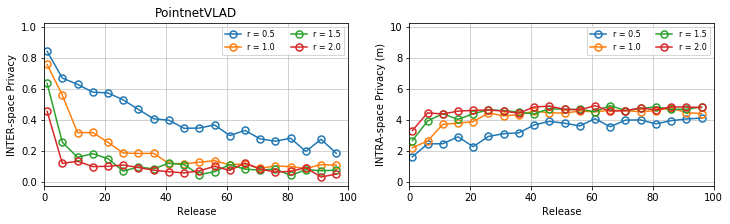

In [50]:
fig=plt.figure(figsize=(12, 3))

ax1 = fig.add_subplot(121) 

ax1.grid(alpha = 0.7)
ax1.set_ylim(-0.025,1.025)
ax1.set_xlim(0,100)
ax1.set_ylabel("INTER-space Privacy")
ax1.set_xlabel("Release")
ax1.set_title("PointnetVLAD")

markersize = 7
linewidth = 1.5
#plt.minorticks_on()

for i, radius in enumerate(np.arange(0.5,2.1,0.5)):

    ax1.plot(
        np.arange(1,100,5),
        pointnetvlad_successive[i][:,1],
        "-o",
        linewidth = linewidth,fillstyle = 'none',
        mew = linewidth,markersize = markersize,
        label = "r = "+str(radius)
    )

ax1.legend(loc = "upper right", ncol = 2, fontsize = 8);

ax2 = fig.add_subplot(122) 

ax2.grid(alpha = 0.7)
ax2.set_ylim(-0.25,10.25)
ax2.set_xlim(0,100)

ax2.set_ylabel("INTRA-space Privacy (m)")
ax2.set_xlabel("Release")
#ax2.set_yticklabels(fontsize = 16)
#ax2.set_xticklabels(fontsize = 16)

#plt.minorticks_on()

for i, radius in enumerate(np.arange(0.5,2.1,0.5)):

    ax2.plot(
        np.arange(1,100,5),
        pointnetvlad_successive[i][:,2],
        "-o",
        linewidth = linewidth,fillstyle = 'none',
        mew = linewidth,markersize = markersize,
        label = "r = "+str(radius)
    )


ax2.legend(loc = "upper right", ncol = 2, fontsize = 8);

#plt.savefig('arcore_results/partials-radius-pointnetvlad-jittered.png', format='png', dpi=300,bbox_inches = 'tight')

In [42]:
pointnetvlad_successive[i][:,1]

array([0.75625   , 0.55862069, 0.31707317, 0.31818182, 0.25490196,
       0.1863354 , 0.18300654, 0.18421053, 0.1183432 , 0.11702128,
       0.12686567, 0.13664596, 0.1097561 , 0.11656442, 0.0875    ,
       0.10285714, 0.0982659 , 0.08666667, 0.11111111, 0.10828025])

In [5]:
def get_bn_decay(batch):
    bn_momentum = tf.train.exponential_decay(
                      BN_INIT_DECAY,
                      batch*BATCH_NUM_QUERIES,
                      BN_DECAY_DECAY_STEP,
                      BN_DECAY_DECAY_RATE,
                      staircase=True)
    bn_decay = tf.minimum(BN_DECAY_CLIP, 1 - bn_momentum)
    return bn_decay     

def evaluate(QUERY_SETS, output_file):
    global DATABASE_VECTORS
    global QUERY_VECTORS
    global QUERY_DATABASE_NUMPY
    
    #DATABASE_VECTORS = []
    QUERY_VECTORS=[]
    
    ave_recall = np.zeros(25)
    ave_intra_dist = np.zeros(25)
        
    with tf.Graph().as_default():
        with tf.device('/gpu:'+str(GPU_INDEX)):
            print("In Graph")
            query= placeholder_inputs(BATCH_NUM_QUERIES, 1, NUM_POINTS)
            positives= placeholder_inputs(BATCH_NUM_QUERIES, POSITIVES_PER_QUERY, NUM_POINTS)
            negatives= placeholder_inputs(BATCH_NUM_QUERIES, NEGATIVES_PER_QUERY, NUM_POINTS)
            eval_queries= placeholder_inputs(EVAL_BATCH_SIZE, 1, NUM_POINTS)

            is_training_pl = tf.placeholder(tf.bool, shape=())
            print(is_training_pl)

            batch = tf.Variable(0)
            bn_decay = get_bn_decay(batch)

            with tf.variable_scope("query_triplets") as scope:
                vecs= tf.concat([query, positives, negatives],1)
                print(vecs)                
                out_vecs= forward(vecs, is_training_pl, bn_decay=bn_decay)
                print(out_vecs)
                q_vec, pos_vecs, neg_vecs= tf.split(out_vecs, [1,POSITIVES_PER_QUERY,NEGATIVES_PER_QUERY],1)
                print(q_vec)
                print(pos_vecs)
                print(neg_vecs)

            saver = tf.train.Saver()
            
        # Create a session
        gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.95)
        config = tf.ConfigProto(gpu_options=gpu_options)
        config.gpu_options.allow_growth = True
        config.allow_soft_placement = True
        config.log_device_placement = False
        sess = tf.Session(config=config)

        saver.restore(sess, os.path.join(LOG_DIR, model_file))#MODEL_DIR, model_file))
        print("Model restored.")

        ops = {'query': query,
               'positives': positives,
               'negatives': negatives,
               'is_training_pl': is_training_pl,
               'eval_queries': eval_queries,
               'q_vec':q_vec,
               'pos_vecs': pos_vecs,
               'neg_vecs': neg_vecs}
        recall= np.zeros(25)
        count=0
        similarity=[]
        one_percent_recall=[]
        intra_dist_error = np.zeros(25)
        
        if len(DATABASE_VECTORS) == 0:
            for i in range(len(DATABASE_SETS)):
                DATABASE_VECTORS.append(get_latent_vectors(sess, ops, DATABASE_SETS[i]))
        
        for j in range(len(QUERY_SETS)):
            QUERY_VECTORS.append(get_latent_vectors(sess, ops, QUERY_SETS[j]))

        for m in range(len(DATABASE_SETS)):
            for n in range(len(QUERY_SETS)):
                #if(m==n): # We remove this cause we have disjoint testing sets for partial spaces.
                #    continue
                pair_recall, pair_similarity, pair_opr, mean_intra_dist = get_recall(sess, ops, m, n)
                recall+=np.array(pair_recall)
                intra_dist_error += np.array(mean_intra_dist)
                count+=1
                one_percent_recall.append(pair_opr)
                for x in pair_similarity:
                    similarity.append(x)

        print()
        ave_recall=recall/count
        print("Recall:",recall,count)
        print("Ave recall:",ave_recall)
        print("Average Inter-space Error:",1-0.01*ave_recall)
        
        ave_intra_dist=intra_dist_error/count
        #print("Recall:",recall,count)
        print("Ave Intra-space Distance Error:",ave_intra_dist)

        #print(similarity)
        average_similarity= np.mean(similarity)
        print("Average similarity:",average_similarity)

        ave_one_percent_recall= np.mean(one_percent_recall)
        print("Average 1\%-recall:",ave_one_percent_recall)
        
        # skipping output dump
        """
        #filename=RESULTS_FOLDER +'average_recall_oxford_netmax_sg(finetune_conv5).txt'
        with open(output_file, "w") as output:
            output.write("Average Recall @N:\n")
            output.write(str(ave_recall))
            output.write("\n\n")
            output.write("Average Inter-space Error @N:\n")
            output.write(str(1-ave_recall))
            output.write("\n\n")
            output.write("Average Intra-space Distance Error @N:\n")
            output.write(str(ave_intra_dist))
            output.write("\n\n")
            output.write("Average Similarity:\n")
            output.write(str(average_similarity))
            output.write("\n\n")
            output.write("Average Top 1% Recall:\n")
            output.write(str(ave_one_percent_recall))
            
        with open(RESULTS_FOLDER +pickle_file,'wb') as pickle_output:
            pickle.dump(results_pickle, pickle_output)
            print("Saved up to radius",radius,len(results_pickle))
        
        """
        
    return np.asarray(1-0.01*ave_recall), np.asarray(ave_intra_dist)

def get_latent_vectors(sess, ops, dict_to_process):
    is_training=False
    train_file_idxs = np.arange(0, len(dict_to_process.keys()))
    #print(len(train_file_idxs))
    batch_num= BATCH_NUM_QUERIES*(1+POSITIVES_PER_QUERY+NEGATIVES_PER_QUERY)
    q_output = []
    for q_index in range(len(train_file_idxs)//batch_num):
        file_indices=train_file_idxs[q_index*batch_num:(q_index+1)*(batch_num)]
        file_names=[]
        for index in file_indices:
            file_names.append(dict_to_process[index]["query"])
        queries=load_pc_files(file_names)
        # queries= np.expand_dims(queries,axis=1)
        q1=queries[0:BATCH_NUM_QUERIES]
        q1=np.expand_dims(q1,axis=1)
        #print(q1.shape)

        q2=queries[BATCH_NUM_QUERIES:BATCH_NUM_QUERIES*(POSITIVES_PER_QUERY+1)]
        #print(q2.shape)
        q2=np.reshape(q2,(BATCH_NUM_QUERIES,POSITIVES_PER_QUERY,NUM_POINTS,3))

        q3=queries[BATCH_NUM_QUERIES*(POSITIVES_PER_QUERY+1):BATCH_NUM_QUERIES*(NEGATIVES_PER_QUERY+POSITIVES_PER_QUERY+1)]
        q3=np.reshape(q3,(BATCH_NUM_QUERIES,NEGATIVES_PER_QUERY,NUM_POINTS,3))
        feed_dict={ops['query']:q1, ops['positives']:q2, ops['negatives']:q3, ops['is_training_pl']:is_training}
        o1, o2, o3=sess.run([ops['q_vec'], ops['pos_vecs'], ops['neg_vecs']], feed_dict=feed_dict)
        
        o1=np.reshape(o1,(-1,o1.shape[-1]))
        o2=np.reshape(o2,(-1,o2.shape[-1]))
        o3=np.reshape(o3,(-1,o3.shape[-1]))

        out=np.vstack((o1,o2,o3))
        q_output.append(out)

    q_output=np.array(q_output)
    if(len(q_output)!=0):  
        q_output=q_output.reshape(-1,q_output.shape[-1])
    #print(q_output.shape)

    #handle edge case
    for q_index in range((len(train_file_idxs)//batch_num*batch_num),len(dict_to_process.keys())):
        index=train_file_idxs[q_index]
        queries=load_pc_files([dict_to_process[index]["query"]])
        queries= np.expand_dims(queries,axis=1)
        #print(query.shape)
        #exit()
        fake_queries=np.zeros((BATCH_NUM_QUERIES-1,1,NUM_POINTS,3))
        fake_pos=np.zeros((BATCH_NUM_QUERIES,POSITIVES_PER_QUERY,NUM_POINTS,3))
        fake_neg=np.zeros((BATCH_NUM_QUERIES,NEGATIVES_PER_QUERY,NUM_POINTS,3))
        q=np.vstack((queries,fake_queries))
        #print(q.shape)
        feed_dict={ops['query']:q, ops['positives']:fake_pos, ops['negatives']:fake_neg, ops['is_training_pl']:is_training}
        output=sess.run(ops['q_vec'], feed_dict=feed_dict)
        #print(output.shape)
        output=output[0]
        output=np.squeeze(output)
        if (q_output.shape[0]!=0):
            q_output=np.vstack((q_output,output))
        else:
            q_output=output

    #q_output=np.array(q_output)
    #q_output=q_output.reshape(-1,q_output.shape[-1])
    print(q_output.shape)
    return q_output

def get_recall(sess, ops, m, n):
    global DATABASE_VECTORS
    global QUERY_VECTORS
    global QUERY_DATABASE_NUMPY

    database_output= DATABASE_VECTORS[m]
    queries_output= QUERY_VECTORS[n]
    
    print(m,n,"Database output:",database_output.shape,"Queries output:",queries_output.shape)

    #print(len(queries_output))
    database_nbrs = KDTree(database_output)
    
    database_numpy = np.asarray(DATABASE_DFS[m])

    num_neighbors=25
    recall=[0]*num_neighbors
    intra_space_distance = [0]*num_neighbors

    top1_similarity_score=[]
    one_percent_retrieved=0
    threshold=max(int(round(len(database_output)/100.0)),1)

    num_evaluated=0
    for i in range(len(queries_output)):
        true_neighbors= QUERY_SETS[n][i][m]
        if(len(true_neighbors)==0):
            continue
        num_evaluated+=1
        distances, indices = database_nbrs.query(np.array([queries_output[i]]),k=num_neighbors)
        for j in range(len(indices[0])):
            if indices[0][j] in true_neighbors:
                if(j==0):
                    similarity= np.dot(queries_output[i],database_output[indices[0][j]])
                    top1_similarity_score.append(similarity)
                recall[j]+=1
                # Only get the intra space for correct labels.
                intra_space_distance[j]+= np.linalg.norm(database_numpy[indices[0][j],1:] - QUERY_DATABASE_NUMPY[i,1:])
                break
        if len(list(set(indices[0][0:threshold]).intersection(set(true_neighbors))))>0:
            one_percent_retrieved+=1

    one_percent_recall=(one_percent_retrieved/float(num_evaluated))*100
    recall=(np.cumsum(recall)/float(num_evaluated))*100
    mean_intra_space_distance = np.array(intra_space_distance)/float(num_evaluated)
    
    #print(recall)
    #print(np.mean(top1_similarity_score))
    #print(one_percent_recall)
    return recall, top1_similarity_score, one_percent_recall, mean_intra_space_distance

def get_similarity(sess, ops, m, n):
    global DATABASE_VECTORS
    global QUERY_VECTORS

    database_output= DATABASE_VECTORS[m]
    queries_output= QUERY_VECTORS[n]

    threshold= len(queries_output)
    print(len(queries_output))
    database_nbrs = KDTree(database_output)

    similarity=[]
    for i in range(len(queries_output)):
        distances, indices = database_nbrs.query(np.array([queries_output[i]]),k=1)
        for j in range(len(indices[0])):
            q_sim= np.dot(q_output[i], database_output[indices[0][j]])
            similarity.append(q_sim)
    average_similarity=np.mean(similarity)
    print(average_similarity)
    return average_similarity